# Unsupervised Learning

## Supervised Learning

So far, in all the machine learning problems we've looked at, we had training data where the label $y$ was known.

This is called **supervised learning.** Think of a child learning their shapes under the *supervision* of an adult.

## Unsupervised Learning

What if we have training data without labels $y$?

This is called **unsupervised learning.** It is like a child who has been left to learn about shapes on their own without an adult to guide them.

## Clustering

**Clustering** is one type of unsupervised learning.

The goal is to find groups of similar observations.

For example, consider the Palmer penguins data set.

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

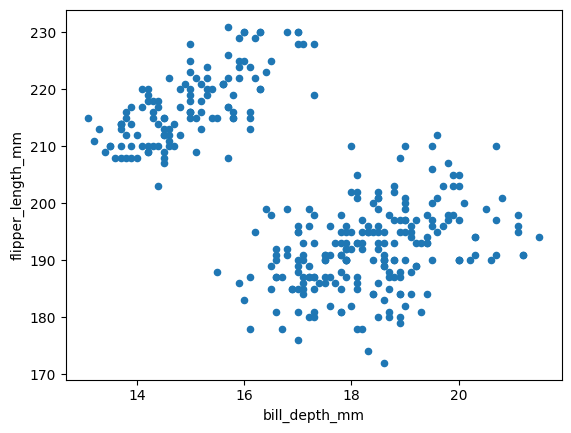

In [7]:
import pandas as pd
df = pd.read_csv('../week2/data/penguins.csv')
df.plot.scatter(x='bill_depth_mm', y='flipper_length_mm')

There appear to be at least two distinct types of penguins.

## $K$-Means Clustering

### Reading in the Data

In [8]:
import numpy as np
import pandas as pd

df_penguins = pd.read_csv("../week2/data/penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's focus on just two of the variables, the bill depth and flipper length, so that we can easily visualize the data. Based on the scatterplot below, how many clusters are there in this data set? Can you devise an algorithm that would automatically identify those clusters?

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

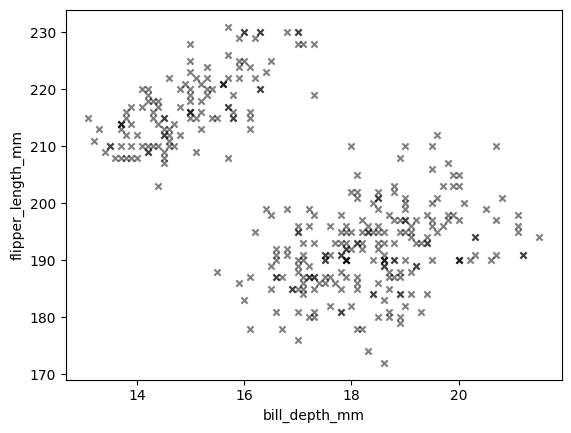

In [9]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c="black", marker="x", alpha=.5)

These two variables are on very different scales, so we will need to scale them first.

In [10]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()

### Implementing K-Means from Scratch

$K$-means is an algorithm for finding clusters in data. The idea behind $k$-means is simple: each cluster has a "center" point called the **centroid**, and each observation is assigned to the cluster of its nearest centroid. The challenge is finding the right centroids. The $k$-means algorithm starts with a random guess for the centroids and iteratively improves them.

The steps are as follows:

1. Initialize $k$ centroids at random.
2. Assign each point to the cluster of its nearest centroid.
3. (After reassignment, each centroid may no longer be at the center of its cluster.) Recompute each centroid based on the points assigned to its cluster.
4. Repeat steps 2 and 3 until no points change clusters.

First, we will implement the $k$-means algorithm from scratch. First, let's sample 3 observations at random from the penguins data to serve as the initial centroids.

,bill_depth_mm,flipper_length_mm
r,0.379194,-0.776236
b,2.050255,-0.705121
y,0.277918,-0.562890


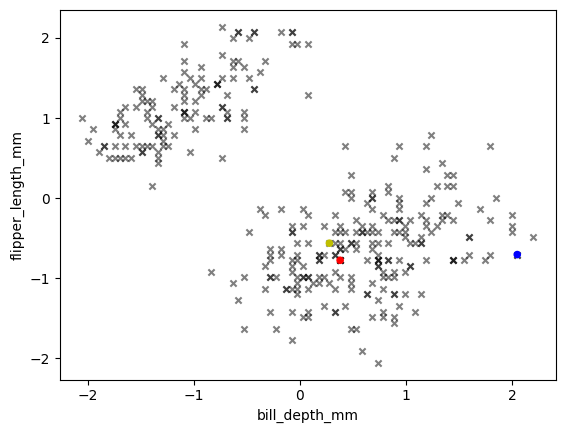

In [12]:
# Initialize 3 centroids at random from the data.
centroids = X_train_scaled.sample(n=3)

# Call the three clusters "red", "blue", "yellow" for convenience.
centroids.index = ["r", "b", "y"]

# Plot these centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                   c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)
centroids

Now we assign each point to the cluster of its nearest centroid.

In [13]:
obs = X_train_scaled.loc[0]
np.sqrt(((obs - centroids) ** 2).sum(axis=1)).idxmin()

'r'

In [14]:
# Finds the nearest centroid to a given observation.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train_scaled.loc[0])

'r'

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

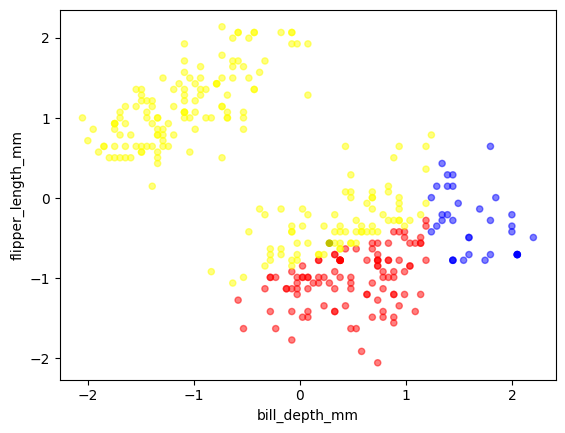

In [16]:
# Apply the function to the entire data set.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Plot the cluster assignments.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                   c=clusters.map({"r": "red", "b": "blue", "y": "yellow"}),
                                   alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", 
                       c=centroids.index, ax=ax)

Notice that some of the centroids are no longer at the center of their clusters. We can fix that by redefining the centroid to be the mean of the points in its cluster.

,bill_depth_mm,flipper_length_mm
b,1.597580,-0.280585
r,0.488592,-1.019771
y,-0.514832,0.578104


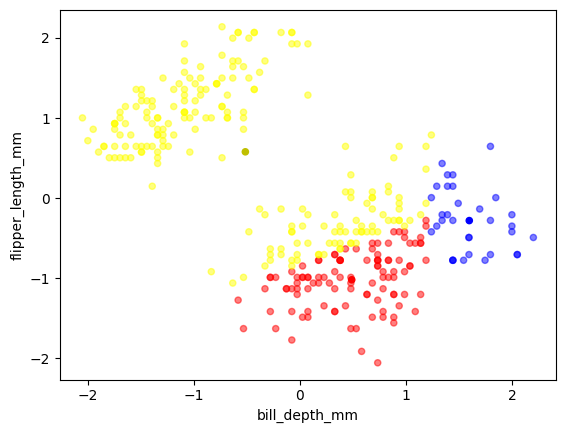

In [18]:
# Calculate the mean length and width for each cluster.
centroids = X_train_scaled.groupby(clusters).mean()
centroids

# Let's plot the new centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                   c=clusters.map({"r": "red", "b": "blue", "y": "yellow"}),
                                   alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm", 
                       c=centroids.index, ax=ax)

centroids

Now, there may be some points that are no longer assigned to their closest centroid, so we have to go back and re-assign clusters. But that may cause the centroids to no longer be at the center of their cluster, so we have to recalculate the centroids. And so on. This process continues until the cluster assignments stop changing.

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

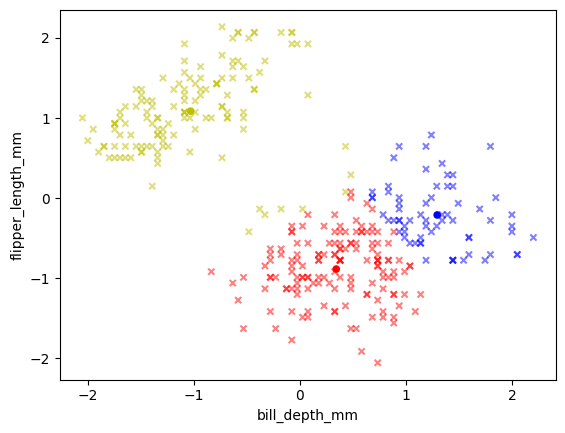

In [19]:
# Assign points to their nearest centroid.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train_scaled.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

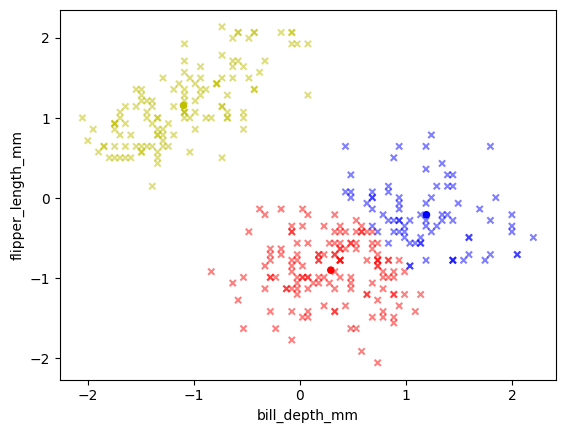

In [20]:
# Assign points to their nearest centroid.
clusters = X_train_scaled.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train_scaled.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train_scaled.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                                 c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                       c=centroids.index, ax=ax)

We can run the code in the above cell over and over until the clusters stop changing. This is the final cluster assignment.

### $K$-Means in _scikit-learn_

We rarely need to implement the $k$-means algorithm from scratch because it is available in _scikit-learn_. The API for _scikit-learn_'s $k$-means model is similar to the API for supervised learning models, like $k$-nearest neighbors, except that the `.fit()` method only takes in `X`, not `X` and `y`. This makes sense because in unsupervised learning, there are no labels `y` in the training data.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
pipeline = make_pipeline(
    StandardScaler(),
    model
)

pipeline.fit(X_train)

,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [22]:
model.cluster_centers_

array([[ 0.69383971, -1.31036902],
       [-0.92186858,  1.24233281],
       [ 0.11927257, -0.55885936],
       [ 0.97646597,  0.19358318],
       [ 0.82820675, -0.55533648],
       [-1.63860397,  0.98174327],
       [-1.39699556,  0.62412072],
       [-0.11669786, -1.14284047],
       [-0.42579718,  1.81391323],
       [ 1.65770268, -0.45546191]])

In [23]:
# Extract the centroids and the clusters.
centroids = model.cluster_centers_
clusters = model.labels_

clusters

array([0, 7, 2, 4, 9, 0, 9, 4, 9, 7, 7, 7, 9, 9, 0, 4, 9, 0, 9, 0, 0, 4,
       0, 7, 0, 0, 0, 0, 0, 7, 0, 2, 0, 2, 9, 9, 0, 0, 0, 0, 4, 0, 9, 7,
       4, 0, 0, 2, 9, 7, 4, 2, 3, 0, 4, 7, 4, 7, 4, 7, 9, 7, 4, 7, 2, 2,
       4, 7, 3, 4, 4, 2, 4, 2, 4, 2, 0, 7, 4, 2, 2, 0, 4, 2, 9, 4, 4, 4,
       4, 3, 3, 7, 0, 7, 3, 4, 4, 7, 4, 2, 3, 7, 9, 4, 0, 2, 9, 7, 4, 2,
       9, 2, 4, 9, 4, 7, 9, 7, 4, 7, 9, 7, 3, 7, 3, 2, 4, 2, 3, 2, 4, 4,
       3, 7, 2, 2, 9, 7, 2, 2, 7, 7, 2, 2, 0, 4, 0, 2, 4, 7, 3, 5, 8, 6,
       1, 5, 5, 6, 1, 5, 1, 5, 1, 5, 6, 6, 1, 5, 1, 6, 1, 5, 5, 6, 1, 5,
       1, 5, 1, 6, 1, 1, 6, 6, 8, 1, 8, 5, 8, 6, 6, 6, 8, 5, 1, 8, 5, 6,
       8, 5, 1, 6, 5, 6, 1, 5, 1, 6, 1, 6, 1, 6, 1, 5, 8, 5, 8, 5, 8, 5,
       1, 1, 1, 1, 1, 1, 8, 6, 8, 5, 8, 6, 1, 6, 8, 5, 8, 5, 5, 5, 8, 1,
       8, 6, 8, 6, 8, 1, 1, 6, 8, 1, 8, 1, 8, 5, 1, 6, 1, 6, 6, 1, 8, 1,
       8, 5, 8, 1, 8, 5, 5, 1, 6, 1, 2, 4, 4, 4, 9, 2, 0, 4, 4, 9, 2, 9,
       7, 3, 2, 3, 9, 0, 4, 4, 7, 2, 7, 4, 2, 4, 3,

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

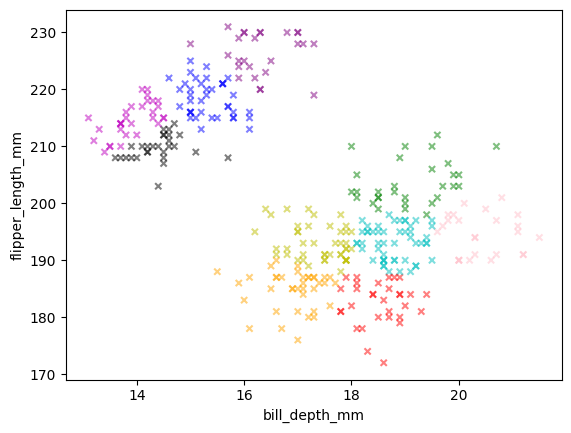

In [24]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y",
    3: "g",
    4: "c",
    5: "m",
    6: "k",
    7: "orange",
    8: "purple",
    9: "pink"
})

# Plot the data
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, marker="x", alpha=.5)

We can call `.predict()` to get the cluster assignment for a new observation. For example, consider a penguin with a bill depth of 15 mm and a flipper length of 210 mm. Visually, it's obvious which cluster this penguin should be assigned to. Let's check that this penguin is indeed assigned to that cluster.

In [25]:
pipeline.predict([[15, 210]])

/home/dhlee/workspace/DATASCI112/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6], dtype=int32)

Note that `.predict()` simply assigns the test observation to the nearest cluster without recalculating the centroids. (If this observation had been in the training data, then assigning it to a cluster would move the centroid, which in turn would change the assignment of the other points to clusters, and so on.)

## Applications of Clustering

- **Ecology:** An ecologists wants to group organisms into types.
- **Market Segmentation:** A business wants to group their customers into types.
- **Language:** A linguist might want to identify different uses of ambiguous words like "set" or "run".

In section tomorrow, you will explore applications to document clustering and image compression.